In [1]:
!pip install missingno

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import sklearn as sk
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load the generated dataset
df = pd.read_csv("aircraft_engine_maintenance.csv")
Aircraft_engine = df
Aircraft_engine

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 0:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 0:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 0:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 0:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 0:40:00,456.036638,119.311479,3143.603114,1.060224,0
...,...,...,...,...,...,...,...,...
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0


In [4]:
# Display the first few rows of the dataset
Aircraft_engine.head(10)

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 0:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 0:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 0:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 0:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 0:40:00,456.036638,119.311479,3143.603114,1.060224,0
5,5,1,2023-01-01 0:50:00,473.186271,111.985134,2847.832285,1.081155,0
6,6,1,2023-01-01 1:00:00,549.785305,112.858185,3119.941093,1.278465,0
7,7,1,2023-01-01 1:10:00,473.163440,128.219440,2832.073481,0.972845,0
8,8,1,2023-01-01 1:20:00,421.754973,114.891336,3273.250992,1.040050,1
9,9,1,2023-01-01 1:30:00,391.201634,104.419981,3057.934114,1.033222,0


In [5]:
Aircraft_engine.tail(10)

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
710,710,5,2023-01-01 22:20:00,557.071641,128.336764,2615.792220,0.932226,0
711,711,5,2023-01-01 22:30:00,552.634458,127.183493,2833.171285,1.246779,0
712,712,5,2023-01-01 22:40:00,404.902055,83.726968,2918.731654,0.590569,0
713,713,5,2023-01-01 22:50:00,416.696471,98.383527,2925.458456,0.856240,0
714,714,5,2023-01-01 23:00:00,462.587329,123.703826,3006.717114,1.005242,0
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0
719,719,5,2023-01-01 23:50:00,528.452356,141.904141,2927.390424,1.306680,0


In [6]:
Aircraft_engine.shape

(720, 8)

In [7]:
# Summary Statistics
Aircraft_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   Engine_ID         720 non-null    int64  
 2   Timestamp         720 non-null    object 
 3   Temperature       685 non-null    float64
 4   Pressure          693 non-null    float64
 5   Rotational_Speed  720 non-null    float64
 6   Engine_Health     720 non-null    float64
 7   Engine_Failure    720 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 45.1+ KB


In [8]:
# Summary Statistics
Aircraft_engine.describe()

,Unnamed: 0,Engine_ID,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
count,720.000000,720.000000,685.000000,693.000000,720.000000,720.000000,720.000000
mean,359.500000,3.000000,498.339948,119.740059,2997.446124,1.158035,0.116667
std,207.990384,1.415197,49.096470,14.057048,203.755951,0.193976,0.321246
min,0.000000,1.000000,356.824273,75.250630,2370.470207,0.590569,0.000000
25%,179.750000,2.000000,467.160580,109.919889,2854.694306,1.022511,0.000000
50%,359.500000,3.000000,498.815093,119.774723,2993.435873,1.158039,0.000000
75%,539.250000,4.000000,531.952930,128.818293,3139.991527,1.288339,0.000000
max,719.000000,5.000000,662.723810,167.893847,3552.492220,1.791977,1.000000


### Handle missing values

In [9]:
# Check for missing values
Aircraft_engine.isnull().sum()

Unnamed: 0           0
Engine_ID            0
Timestamp            0
Temperature         35
Pressure            27
Rotational_Speed     0
Engine_Health        0
Engine_Failure       0
dtype: int64

<Axes: >

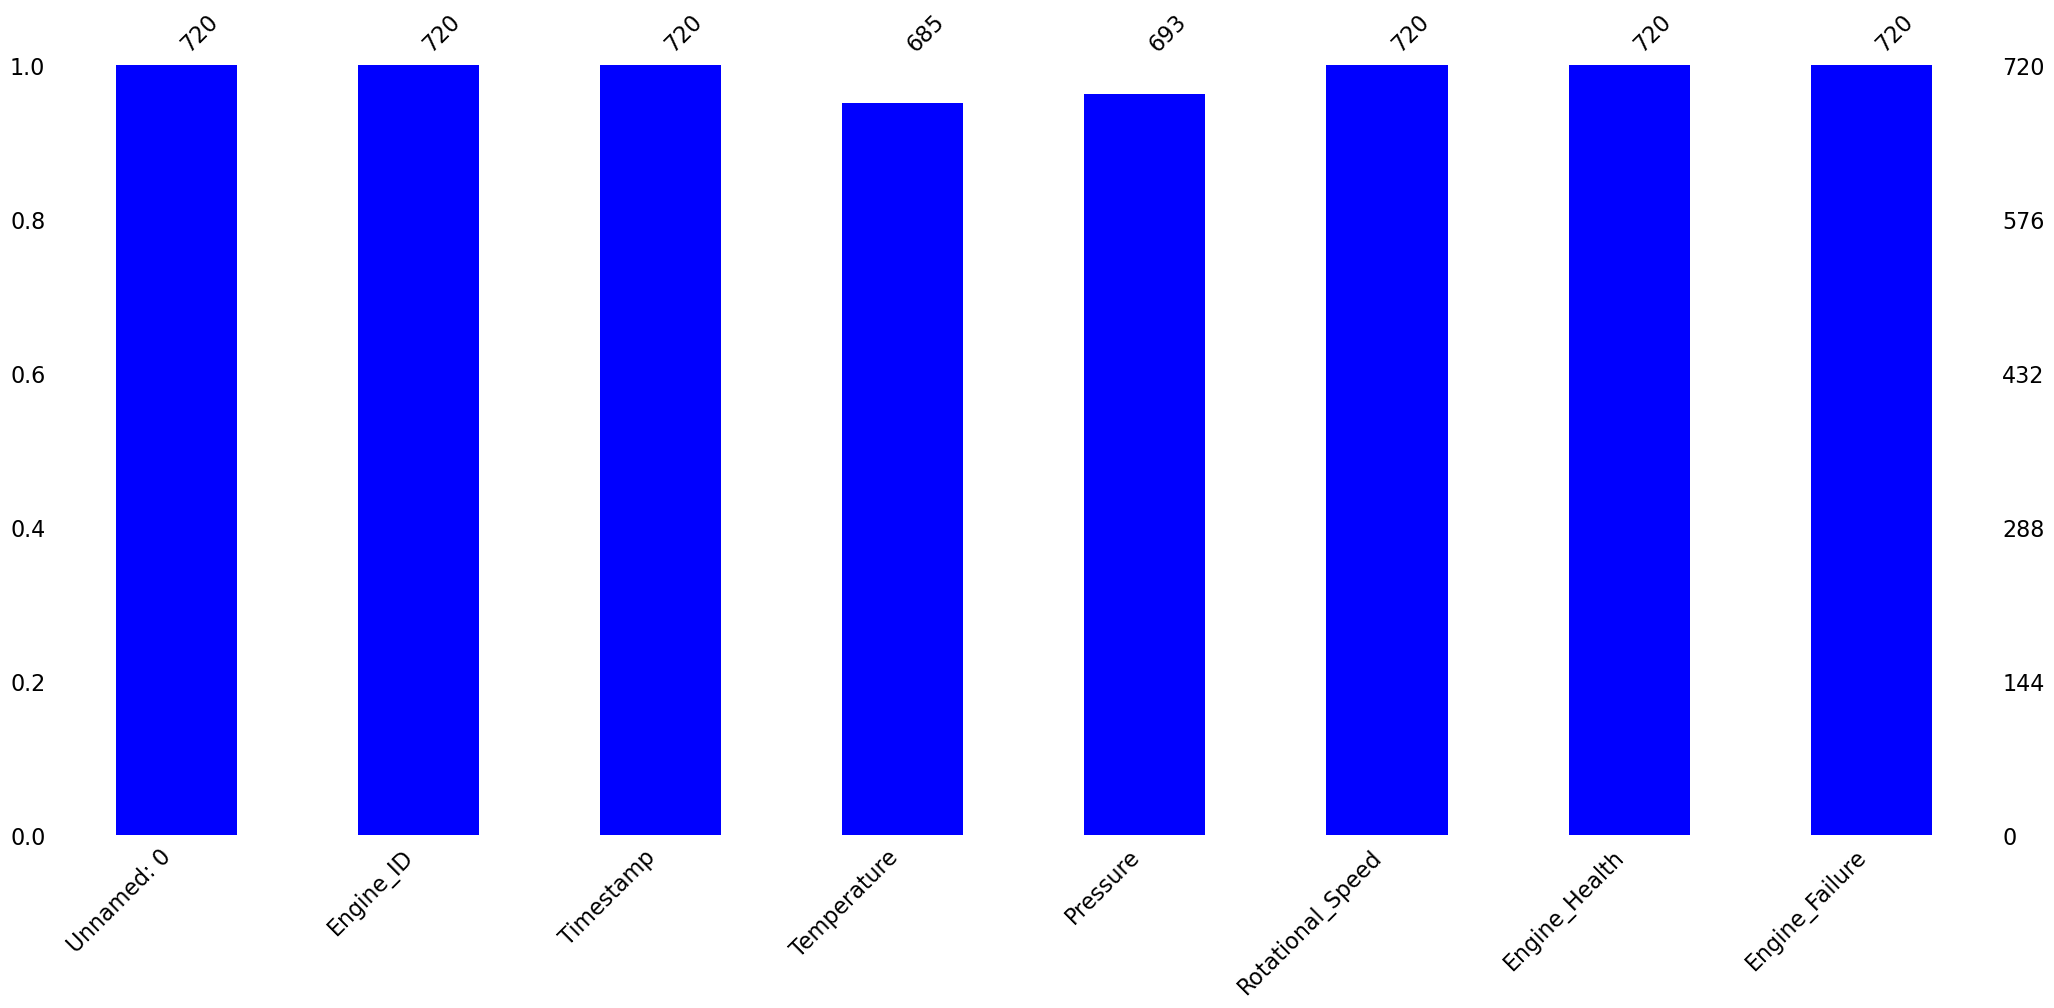

In [10]:
# Display columns with missing values

msno.bar(Aircraft_engine, color="blue")

Text(0.5, 1.0, 'Missing Values')

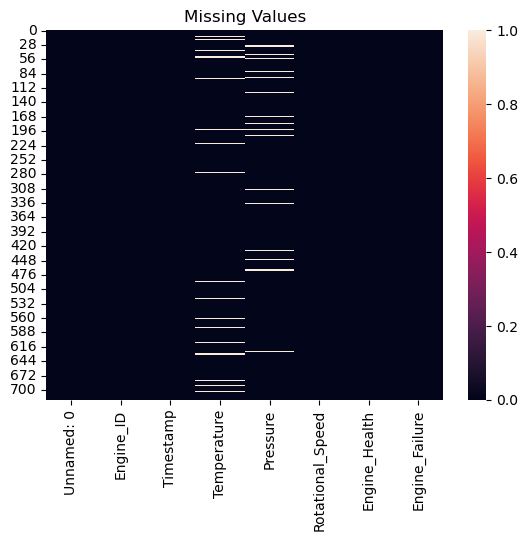

In [11]:
#Visualize the missing data
sns.heatmap(Aircraft_engine.isnull())
plt.title("Missing Values")

In [12]:
# Handling missing values (replace with median value)
numImputer = SimpleImputer(missing_values=np.nan, strategy='median')

numImputer = numImputer.fit(Aircraft_engine[['Temperature', 'Pressure']])

Aircraft_engine[['Temperature', 'Pressure']]=numImputer.transform(Aircraft_engine[['Temperature', 'Pressure']])


In [13]:
# Check for missing values after filling it up with median value
Aircraft_engine.isnull().sum()

Unnamed: 0          0
Engine_ID           0
Timestamp           0
Temperature         0
Pressure            0
Rotational_Speed    0
Engine_Health       0
Engine_Failure      0
dtype: int64

In [14]:
# Check for duplicate values
Aircraft_engine.duplicated().sum()

0

### Handling outliers

In [15]:
numerical_columns = ["Unnamed: 0", "Engine_ID", "Temperature", "Pressure", "Rotational_Speed", "Engine_Health"]

In [16]:
# Calculate IQR for each column
q1 = Aircraft_engine[numerical_columns].quantile(0.25)
q3 = Aircraft_engine[numerical_columns].quantile(0.75)

iqr = q3 - q1

# Identify outliers using IQR
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = ((Aircraft_engine[numerical_columns] < lower_bound) | (Aircraft_engine[numerical_columns] > upper_bound)).any(axis=1)

# Display the number of outliers
print(outliers.sum())

# Display the outlier records
Aircraft_engine[outliers]

28


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
22,22,1,2023-01-01 3:40:00,533.635773,137.049983,3150.407616,1.791977,0
47,47,1,2023-01-01 7:50:00,527.287060,119.774723,3126.762328,1.694284,1
60,60,1,2023-01-01 10:00:00,371.510311,120.605473,3016.902516,1.274749,0
91,91,1,2023-01-01 15:10:00,632.679004,119.774723,3172.149157,1.253916,0
108,108,1,2023-01-01 18:00:00,503.226730,121.167855,3302.271877,0.623076,0
116,116,1,2023-01-01 19:20:00,581.781431,124.478565,2370.470207,0.922681,0
263,263,2,2023-01-01 19:50:00,538.015508,125.204392,2397.496311,0.956164,0
286,286,2,2023-01-01 23:40:00,367.624885,113.118632,3093.883058,1.043080,0
338,338,3,2023-01-01 8:20:00,356.824273,90.269884,3485.596319,0.984538,0
352,352,3,2023-01-01 10:40:00,423.023441,82.212844,2615.461567,0.891795,1


In [17]:
# Remove outliers based on IQR
Aircraft_engine =  Aircraft_engine[~outliers]

# Display the dataset after handling outliers
Aircraft_engine

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 0:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 0:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 0:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 0:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 0:40:00,456.036638,119.311479,3143.603114,1.060224,0
...,...,...,...,...,...,...,...,...
715,715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0
716,716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0
717,717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0
718,718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0


### Univariate Analysis:

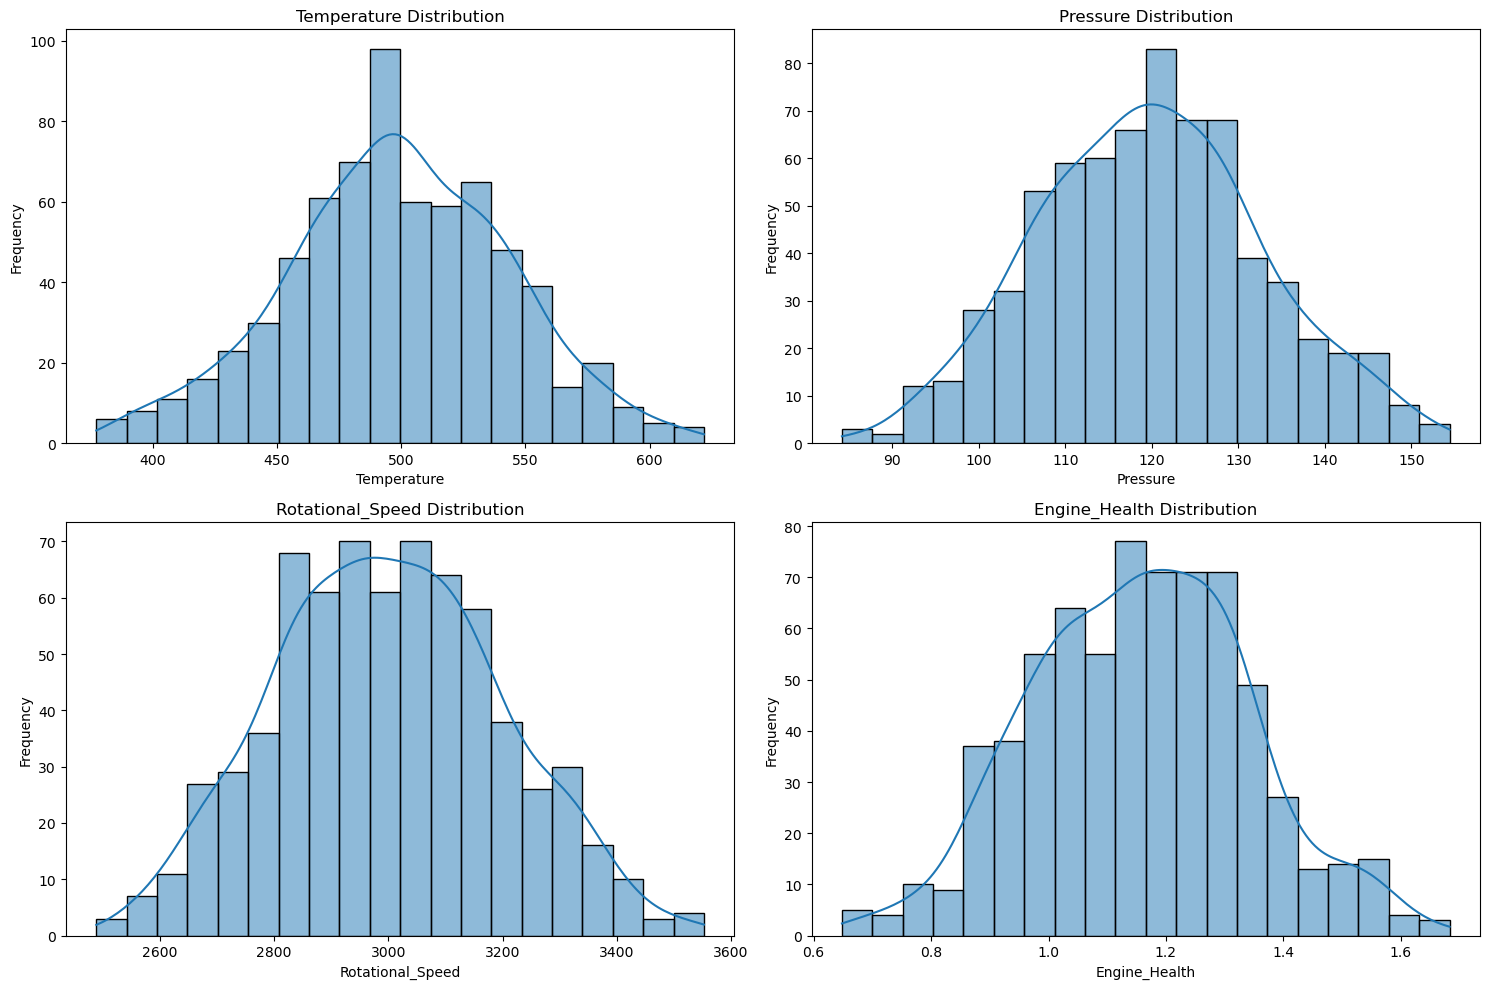

In [18]:
# Defining the columns for univariate analysis
columns_needed = ["Temperature", "Pressure", "Rotational_Speed", "Engine_Health"]


plt.figure(figsize=(15, 10))

for idx, column in enumerate(columns_needed, 1):
    plt.subplot(2, 2, idx)                                                                
    sns.histplot(data=Aircraft_engine[column], bins=20, kde=True)      
    plt.title(f"{column} Distribution")                                 
    plt.xlabel(column)                                                  
    plt.ylabel("Frequency")                                              

plt.tight_layout()
plt.show()


### Bivariate Analysis:

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pairplot of Features with Engine Failure')

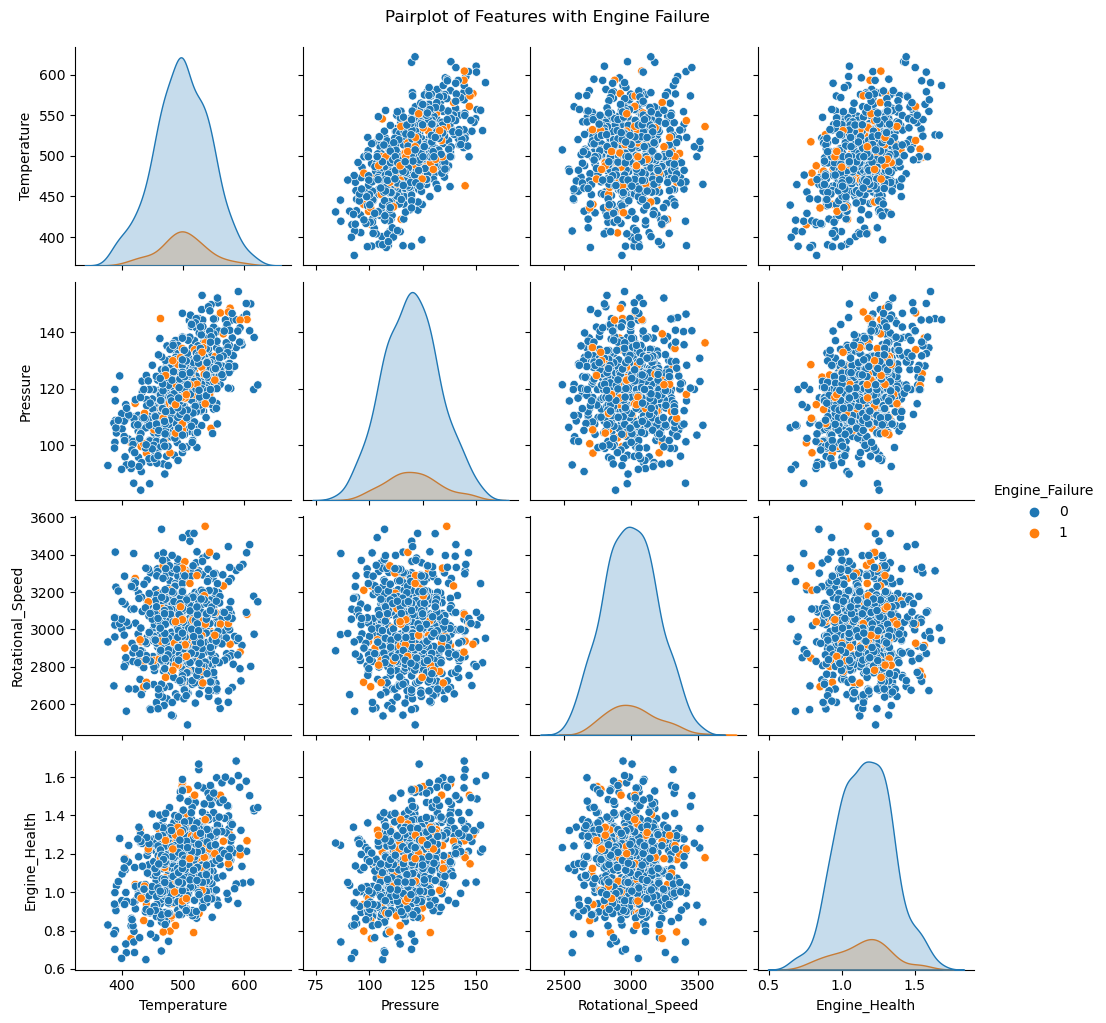

In [19]:
# Bivariate analysis - Pairplot
Aircraft_engine_clean = Aircraft_engine.drop(columns=["Unnamed: 0", "Engine_ID"])

# Create a pairplot with the cleaned DataFrame
sns.pairplot(data=Aircraft_engine_clean, hue='Engine_Failure')
plt.suptitle("Pairplot of Features with Engine Failure", y=1.02)


### Multivariate Analysis:

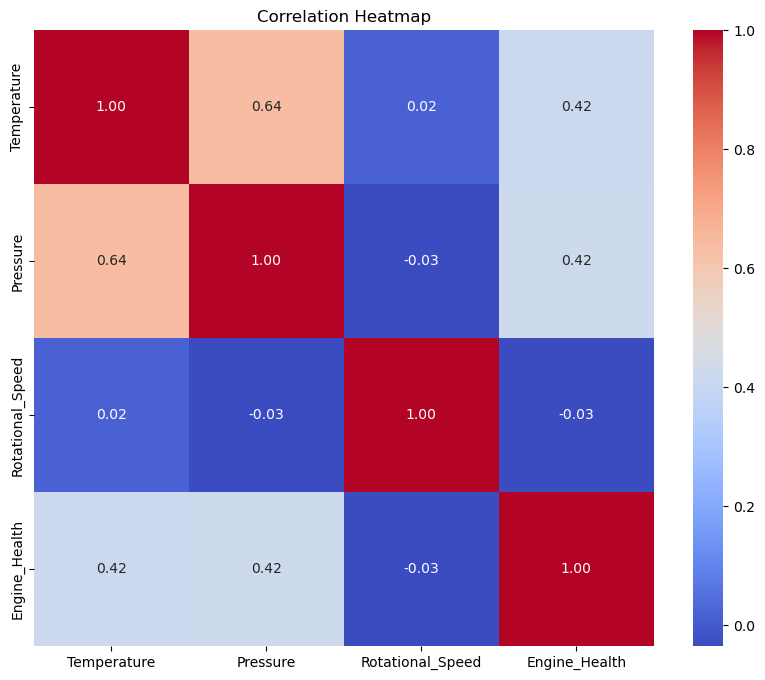

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = Aircraft_engine[columns_needed].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

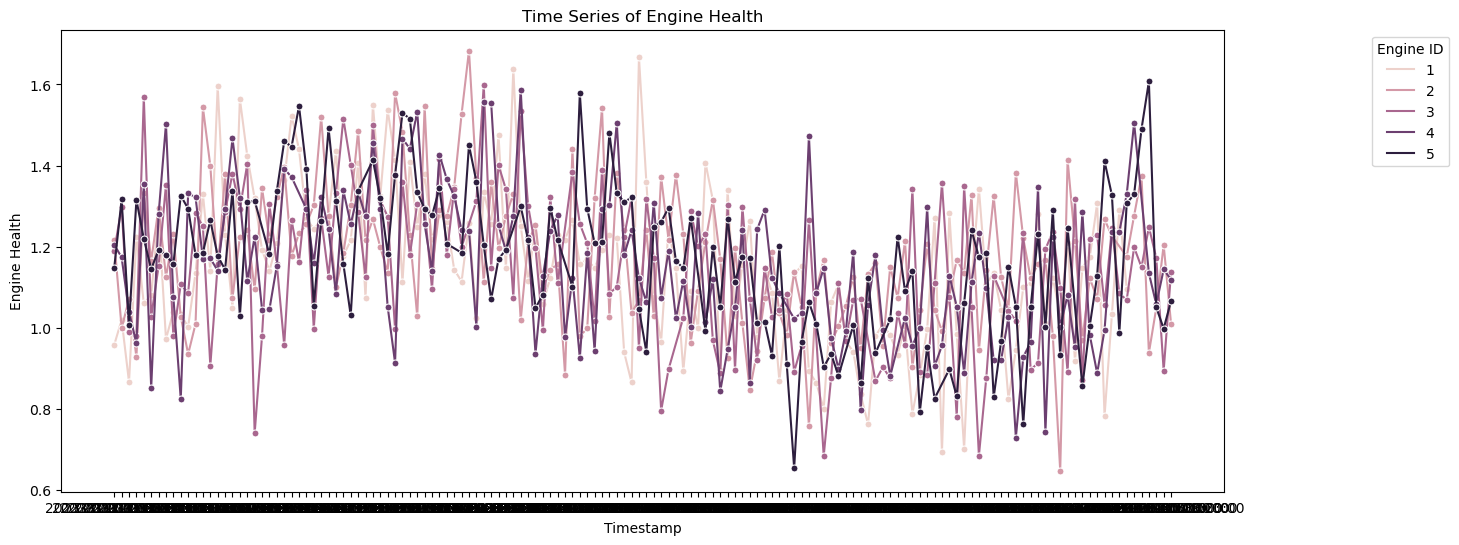

In [21]:
# Data visualization - Time Series of Engine Health
plt.figure(figsize=(15, 6))
sns.lineplot(x="Timestamp", y="Engine_Health", data=Aircraft_engine, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Engine Health")
plt.xlabel("Timestamp")
plt.ylabel("Engine Health")
plt.legend(title="Engine ID", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


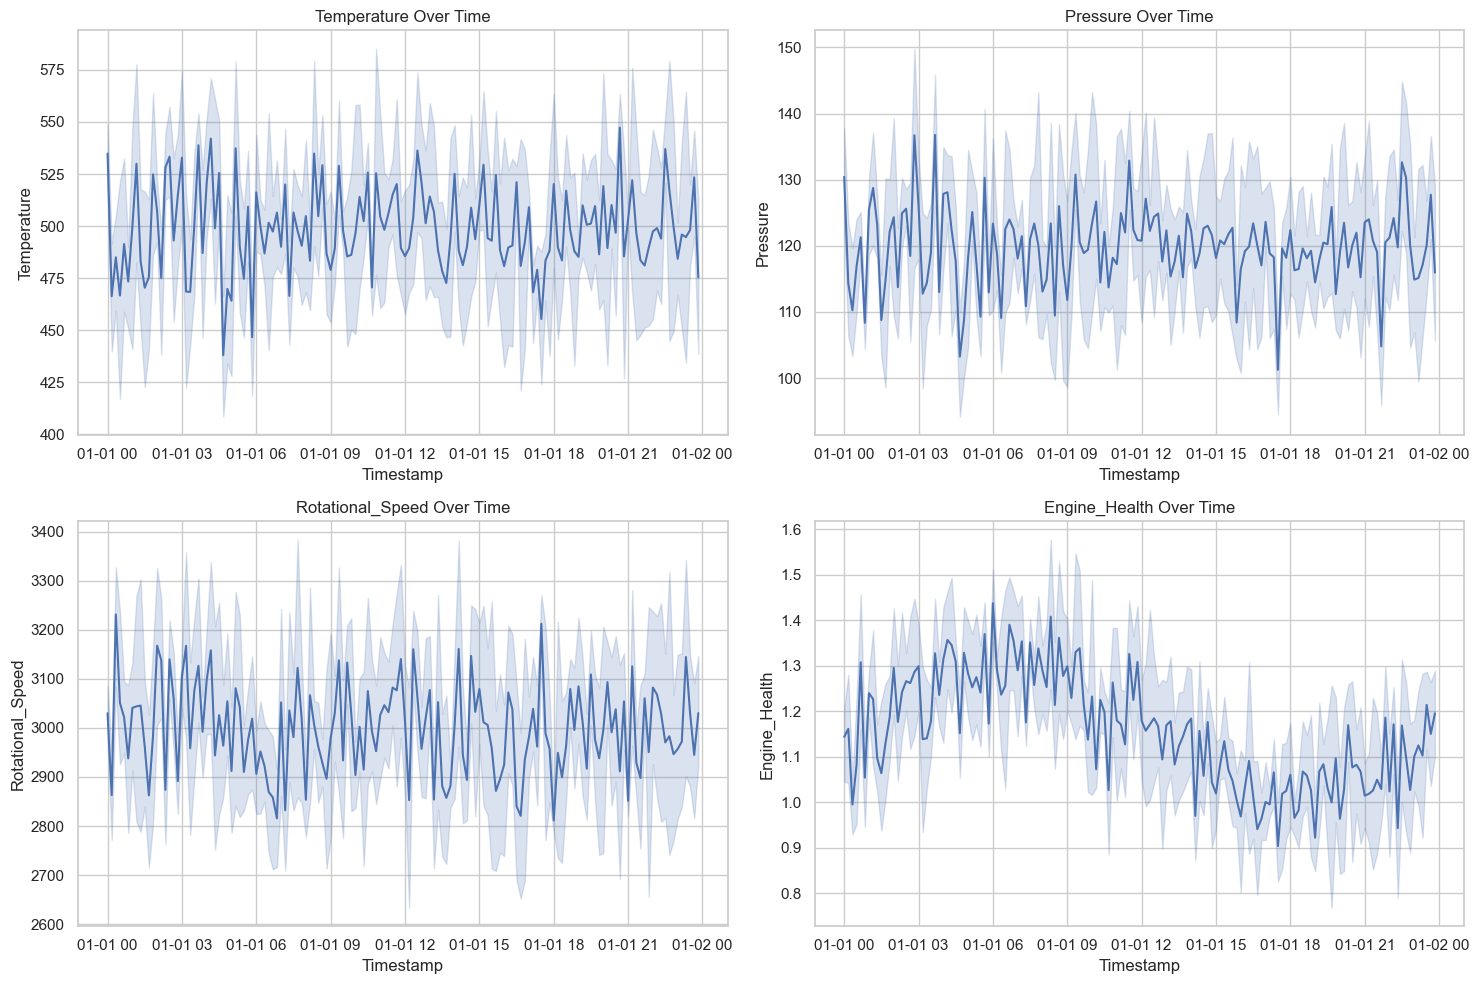

In [39]:
# Data visualization - Time Series of "Temperature", "Pressure", "Rotational_Speed","Engine_Health"
# Sample columns for analysis
columns_needed = ["Temperature", "Pressure", "Rotational_Speed","Engine_Health"]
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_needed , 1):
    plt.subplot(2, 2, i)  
    sns.lineplot(x=Aircraft_engine['Timestamp'], y=Aircraft_engine[column])  
    plt.title(f"{column} Over Time")  
    plt.xlabel("Timestamp")  
    plt.ylabel(column) 

plt.tight_layout()

plt.show()


### Feature Engineering:

#### Create a Time-Related Feature:
#### Let's extract the hour of the day as a new feature.
##### Time-Related Feature (Hour_of_Day): Extracting the hour of the day allows the model to capture potential patterns related to specific times.

In [23]:
Aircraft_engine = Aircraft_engine.copy()

Aircraft_engine['Timestamp'] = pd.to_datetime(Aircraft_engine['Timestamp'], errors='coerce')

Aircraft_engine = Aircraft_engine.dropna(subset=['Timestamp'])
Aircraft_engine['Hour_of_Day'] = Aircraft_engine['Timestamp'].dt.hour

#print(Aircraft_engine.dtypes)

print(Aircraft_engine.head())

   Unnamed: 0  Engine_ID           Timestamp  Temperature    Pressure  \
0           0          1 2023-01-01 00:00:00   555.153852  129.023571   
1           1          1 2023-01-01 00:10:00   426.702897  104.987090   
2           2          1 2023-01-01 00:20:00   474.445973  105.454510   
3           3          1 2023-01-01 00:30:00   489.826688  127.166751   
4           4          1 2023-01-01 00:40:00   456.036638  119.311479   

   Rotational_Speed  Engine_Health  Engine_Failure  Hour_of_Day  
0       3049.405740       0.958384               0            0  
1       2972.372774       1.019795               0            0  
2       3355.744366       0.866681               0            0  
3       3031.172120       1.225052               0            0  
4       3143.603114       1.060224               0            0  


#### Create Rolling Averages:
#### Rolling averages can capture trends and patterns over time.
##### Rolling Averages: Calculating rolling averages helps smooth out noise and capture trends over time, especially relevant for time-series data.

In [24]:
# Feature engineering - Create rolling averages for 'Temperature', 'Rotational_Speed' and 'Engine_Health'
Aircraft_engine['Rolling_Avg_Temperature'] = Aircraft_engine.groupby('Engine_ID')['Temperature'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
Aircraft_engine['Rolling_Avg_Rotational_Speed'] = Aircraft_engine.groupby('Engine_ID')['Rotational_Speed'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
Aircraft_engine['Rolling_Avg_Engine_Health'] = Aircraft_engine.groupby('Engine_ID')['Engine_Health'].transform(lambda x: x.rolling(window=10).mean())

# Display the dataset with the new features
Aircraft_engine.head()


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN


#### Binning 'Hour_of_Day':
#### Binning can convert a continuous feature into categorical bins.
##### Binning 'Hour_of_Day': Grouping hours into categories ('Night', 'Morning', 'Afternoon', 'Evening') may help the model recognize patterns related to different parts of the day.


In [25]:
# Feature engineering - Binning 'Hour_of_Day'
bins = [-1, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
Aircraft_engine['Day_Part'] = pd.cut(Aircraft_engine['Hour_of_Day'], bins=bins, labels=labels, right=False)

# Display the dataset with the new feature
Aircraft_engine.head()


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Day_Part
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN,Night
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN,Night
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN,Night
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN,Night
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN,Night


#### Interaction Features:
#### Create interaction features to capture relationships between existing features.
##### Interaction Feature: The product of 'Temperature' and 'Rotational_Speed' creates a new feature that captures the interaction between these two variables.


In [26]:
# Feature engineering - Interaction feature between 'Temperature' and 'Rotational_Speed'
Aircraft_engine['Temp_Rotational_Interaction'] = Aircraft_engine['Temperature'] * Aircraft_engine['Rotational_Speed']

# Display the dataset with the new feature
Aircraft_engine.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Day_Part,Temp_Rotational_Interaction
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,555.153852,3049.405740,NaN,Night,1.692889e+06
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,490.928375,3010.889257,NaN,Night,1.268320e+06
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,485.434241,3125.840960,NaN,Night,1.592119e+06
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,486.532353,3102.173750,NaN,Night,1.484749e+06
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,480.433210,3110.459623,NaN,Night,1.433598e+06


### Visualization

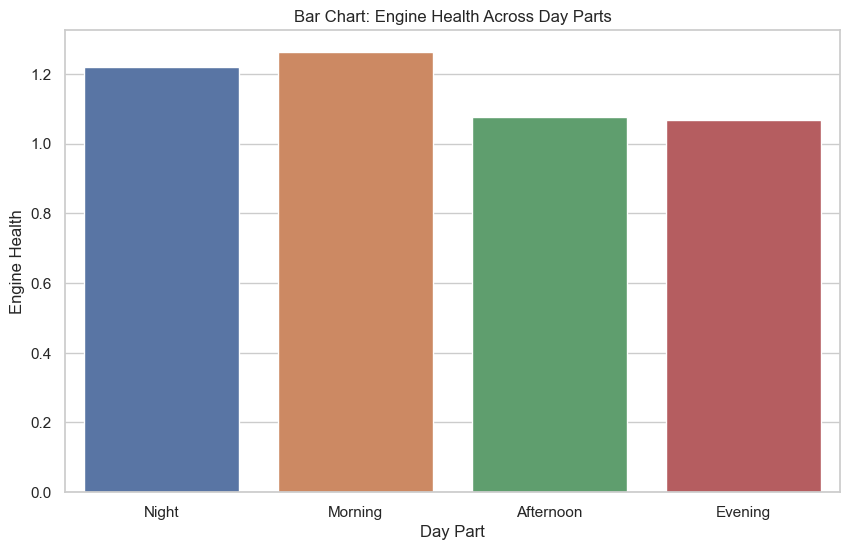

In [27]:
# Set the plotting style
sns.set(style="whitegrid")

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_Part', y='Engine_Health', data=Aircraft_engine, ci=None)
plt.title('Bar Chart: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

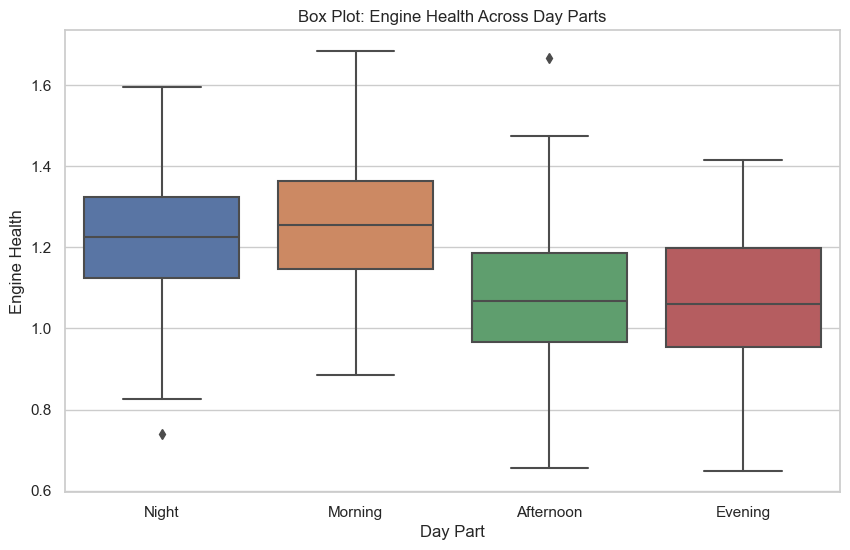

In [28]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_Part', y='Engine_Health', data=Aircraft_engine)
plt.title('Box Plot: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

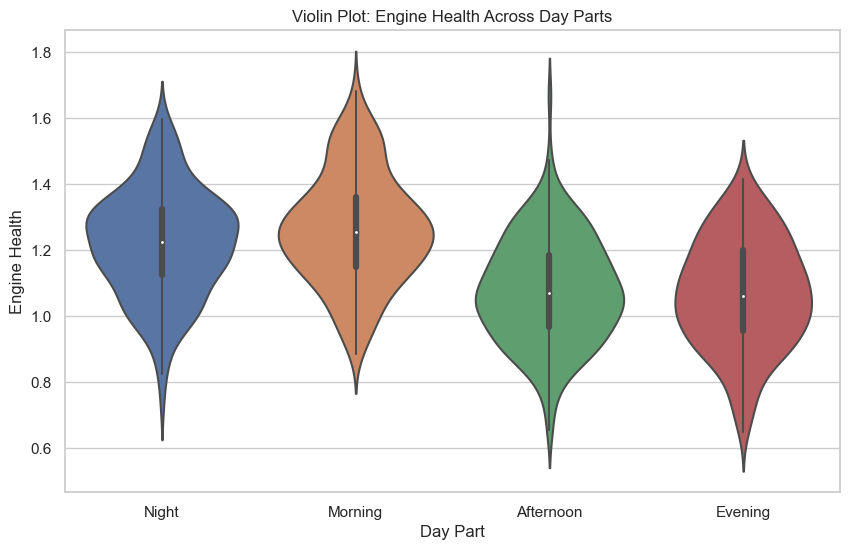

In [29]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Part', y='Engine_Health', data=Aircraft_engine)
plt.title('Violin Plot: Engine Health Across Day Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

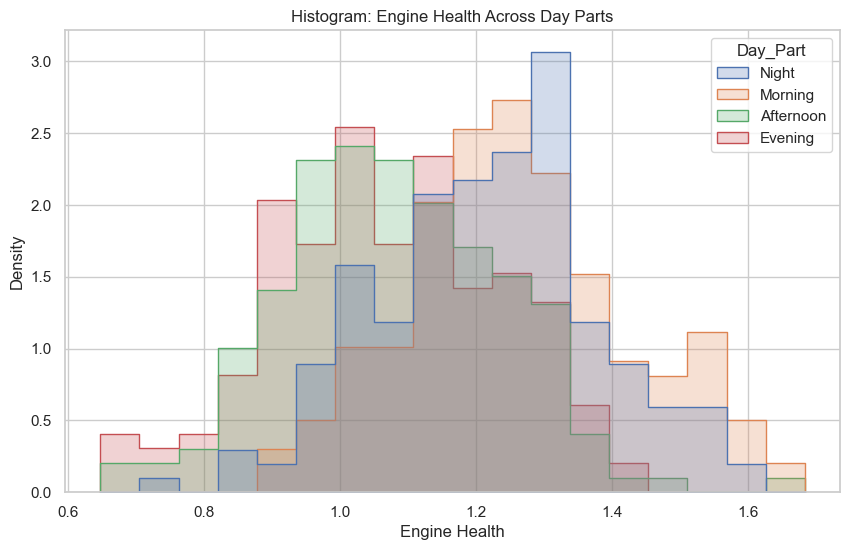

In [30]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='Engine_Health', hue='Day_Part', data=Aircraft_engine, element="step", stat="density", common_norm=False)
plt.title('Histogram: Engine Health Across Day Parts')
plt.xlabel('Engine Health')
plt.ylabel('Density')
plt.show()

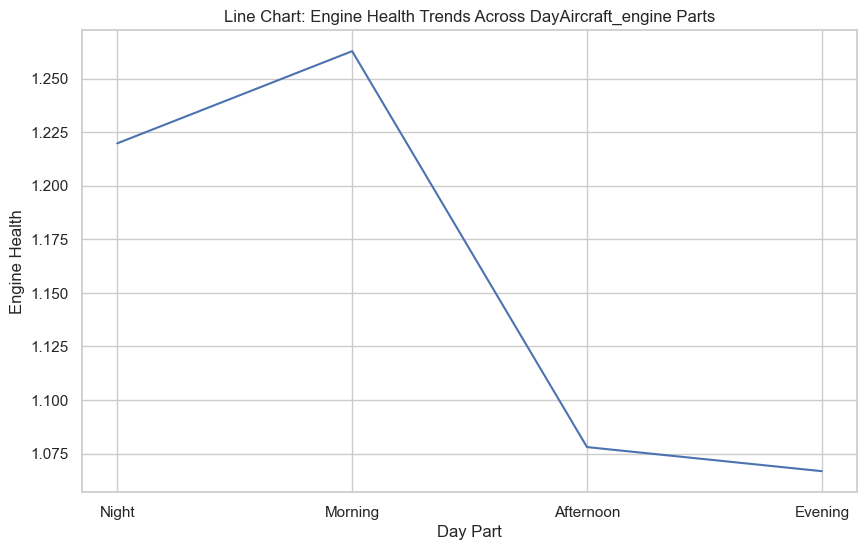

In [31]:
# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_Part', y='Engine_Health', data=Aircraft_engine, ci=None)
plt.title('Line Chart: Engine Health Trends Across DayAircraft_engine Parts')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.show()

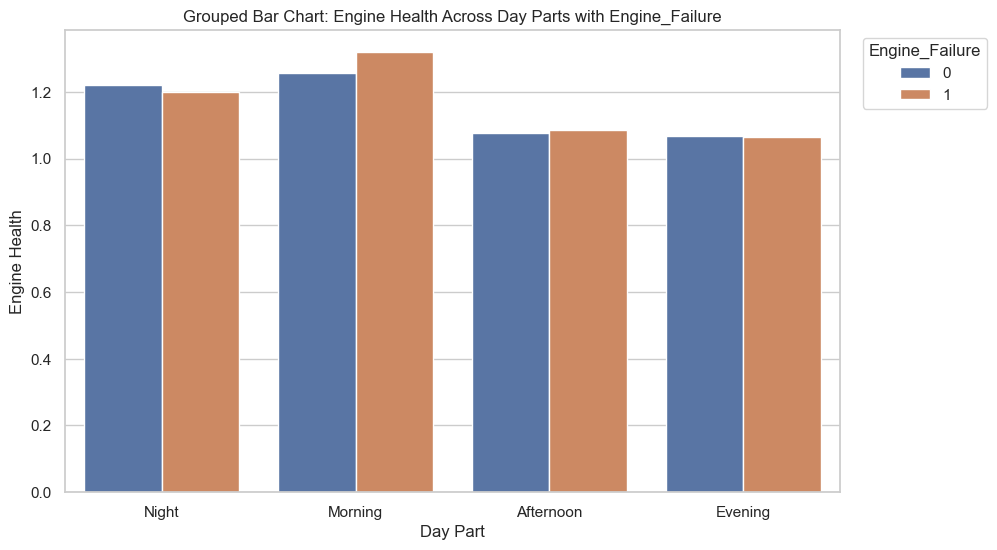

In [33]:
# Grouped Bar Chart
Aircraft_engine['Engine_Failure'] = Aircraft_engine['Engine_Failure'].astype(str)
Aircraft_engine['Day_Part'] = Aircraft_engine['Day_Part'].astype(str)


plt.figure(figsize=(10, 6))
sns.barplot(x='Day_Part', y='Engine_Health', data=Aircraft_engine, ci=None, hue='Engine_Failure')


plt.title('Grouped Bar Chart: Engine Health Across Day Parts with Engine_Failure')
plt.xlabel('Day Part')
plt.ylabel('Engine Health')
plt.legend(title='Engine_Failure', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [34]:
# Summary of Engine Failure
engine_failure_summary = Aircraft_engine["Engine_Failure"].value_counts()
print("Summary of Engine Failure:")
engine_failure_summary

Summary of Engine Failure:


Engine_Failure
0    611
1     81
Name: count, dtype: int64